In [11]:
import pandas as pd

# Definir las rutas de los archivos CSV
archivos_csv = [
    r"C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2024 OPALINE F.csv",
    r"C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2023 OPALINE 2.csv",
    r"C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2022 OPALINE 2.csv",
    r"C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2021 OPALINE 2.csv",
    r"C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2020 OPALINE 2.csv",
    r"C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2019 OPALINE 2.csv",
    r"C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2016 OPALINE 2.csv",
    r"C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2017 OPALINE 2.csv",
    r"C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2018 OPALINE 2.csv"
]

# Leer cada archivo CSV y almacenar en una lista
dfs = []
for archivo in archivos_csv:
    df_temp = pd.read_csv(archivo, low_memory=False)  # Cargar el CSV con low_memory=False
    
    # Convertir todos los nombres de columnas a minúsculas
    df_temp.columns = df_temp.columns.str.lower()
    
    dfs.append(df_temp)
    
    # Imprimir el conteo de filas de cada archivo CSV
    print(f'Archivo: {archivo} - Cantidad de filas: {df_temp.shape[0]}')

# Unir todos los DataFrames en uno solo
df_unificado = pd.concat(dfs, ignore_index=True)

# Imprimir la cantidad total de filas y columnas del DataFrame unificado
print(f'\nCantidad total de filas en el DataFrame unificado: {df_unificado.shape[0]} - Cantidad total de columnas: {df_unificado.shape[1]}')

# Verificar los nombres de las columnas en minúsculas
print(f'Nombres de las columnas en minúsculas: {list(df_unificado.columns)}')


Archivo: C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2024 OPALINE F.csv - Cantidad de filas: 841927
Archivo: C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2023 OPALINE 2.csv - Cantidad de filas: 882555
Archivo: C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2022 OPALINE 2.csv - Cantidad de filas: 889490
Archivo: C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2021 OPALINE 2.csv - Cantidad de filas: 1003348
Archivo: C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2020 OPALINE 2.csv - Cantidad de filas: 824967
Archivo: C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2019 OPALINE 2.csv - Cantidad de filas: 1088696
Archivo: C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2016 OPALINE 2.csv - Cantidad de filas: 768249
Archivo: C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2017 OPALINE 2.csv - Cantidad de filas: 1066375
Archivo: C:\Users\constanza.perez\OneDrive - Colgram\Escritorio\2018 OPALINE 2.csv - Cantidad de filas: 11219

In [19]:
import pandas as pd

# Supongamos que ya tienes el DataFrame df_unificado
# df_unificado = ... (tu DataFrame existente)

# Asegurarse de que la columna 'fecha' esté en formato datetime
df_unificado['fecha'] = pd.to_datetime(df_unificado['fecha'])

# Convertir la columna 'rut' a minúsculas
df_unificado['rut'] = df_unificado['rut'].str.lower()

# Definir el periodo de estudio (dic 2022 a nov 2023)
anio_estudio_inicio = '2023-01-01'
anio_estudio_fin = '2023-12-31'

# Obtener la fecha máxima por 'rut' en el periodo estudiado
df_anio_estudio = df_unificado[(df_unificado['fecha'] >= anio_estudio_inicio) & (df_unificado['fecha'] <= anio_estudio_fin)]
fecha_maxima_por_rut = df_anio_estudio.groupby('rut')['fecha'].min().reset_index()

# Añadir columna de fecha de fin de estudio fija a '2024-11-30'
fecha_maxima_por_rut['fecha_fin_estudio'] = pd.to_datetime('2024-12-31')

# Unir el DataFrame con las fechas máximas y la fecha fin de estudio con el original para ver si volvieron
df_merge = df_unificado.merge(fecha_maxima_por_rut, on='rut', how='inner', suffixes=('', '_max'))

# Filtrar los que no volvieron en el periodo hasta la fecha fin de estudio
df_fugados = df_merge[(df_merge['fecha'] > df_merge['fecha_max']) & (df_merge['fecha'] <= df_merge['fecha_fin_estudio'])]
df_fugados_final = df_merge[~df_merge['rut'].isin(df_fugados['rut'])]

# Contar los RUTs únicos que no volvieron después del periodo de estudio
conteo_fugados = df_fugados_final['rut'].nunique()

# Contar los RUTs únicos en el periodo de estudio
conteo_ruts_periodo = df_anio_estudio['rut'].nunique()

# Calcular el porcentaje de fugados respecto a los RUTs únicos del periodo
porcentaje_fugados = (conteo_fugados / conteo_ruts_periodo) * 100

# Mostrar resultados
print("Conteo de RUTs únicos que no volvieron después del periodo de estudio:")
print(conteo_fugados)
print("Conteo de RUTs únicos en el periodo de estudio:")
print(conteo_ruts_periodo)
print("Porcentaje de fugados respecto a los RUTs únicos del periodo:")
print(porcentaje_fugados)


Conteo de RUTs únicos que no volvieron después del periodo de estudio:
126532
Conteo de RUTs únicos en el periodo de estudio:
212825
Porcentaje de fugados respecto a los RUTs únicos del periodo:
59.453541642194295


In [3]:
import pandas as pd

# Supongamos que ya tienes el DataFrame df_unificado
# df_unificado = ... (tu DataFrame existente)

# Asegurarse de que la columna 'fecha' esté en formato datetime
df_unificado['fecha'] = pd.to_datetime(df_unificado['fecha'])

# Convertir la columna 'rut' a minúsculas
df_unificado['rut'] = df_unificado['rut'].str.lower()

# Definir el periodo de estudio (dic 2022 a nov 2023)
anio_estudio_inicio = '2021-12-01'
anio_estudio_fin = '2022-11-30'

# Obtener la fecha máxima por 'rut' en el periodo estudiado
df_anio_estudio = df_unificado[(df_unificado['fecha'] >= anio_estudio_inicio) & (df_unificado['fecha'] <= anio_estudio_fin)]
fecha_maxima_por_rut = df_anio_estudio.groupby('rut')['fecha'].min().reset_index()

# Añadir columna de fecha de fin de estudio fija a '2024-11-30'
fecha_maxima_por_rut['fecha_fin_estudio'] = pd.to_datetime('2024-11-30')

# Unir el DataFrame con las fechas máximas y la fecha fin de estudio con el original para ver si volvieron
df_merge = df_unificado.merge(fecha_maxima_por_rut, on='rut', how='inner', suffixes=('', '_max'))

# Filtrar los que no volvieron en el periodo hasta la fecha fin de estudio
df_fugados = df_merge[(df_merge['fecha'] > df_merge['fecha_max']) & (df_merge['fecha'] <= df_merge['fecha_fin_estudio'])]
df_fugados_final = df_merge[~df_merge['rut'].isin(df_fugados['rut'])]

# Contar los RUTs únicos que no volvieron después del periodo de estudio
conteo_fugados = df_fugados_final['rut'].nunique()

# Contar los RUTs únicos en el periodo de estudio
conteo_ruts_periodo = df_anio_estudio['rut'].nunique()

# Calcular el porcentaje de fugados respecto a los RUTs únicos del periodo
porcentaje_fugados = (conteo_fugados / conteo_ruts_periodo) * 100

# Mostrar resultados
print("Conteo de RUTs únicos que no volvieron después del periodo de estudio:")
print(conteo_fugados)
print("Conteo de RUTs únicos en el periodo de estudio:")
print(conteo_ruts_periodo)
print("Porcentaje de fugados respecto a los RUTs únicos del periodo:")
print(porcentaje_fugados)


Conteo de RUTs únicos que no volvieron después del periodo de estudio:
316950
Conteo de RUTs únicos en el periodo de estudio:
853905
Porcentaje de fugados respecto a los RUTs únicos del periodo:
37.11771215767562


In [4]:
import pandas as pd

# Supongamos que ya tienes el DataFrame df_unificado
# df_unificado = ... (tu DataFrame existente)

# Asegurarse de que la columna 'fecha' esté en formato datetime
df_unificado['fecha'] = pd.to_datetime(df_unificado['fecha'])

# Convertir la columna 'rut' a minúsculas
df_unificado['rut'] = df_unificado['rut'].str.lower()

# Definir el periodo de estudio (dic 2022 a nov 2023)
anio_estudio_inicio = '2020-12-01'
anio_estudio_fin = '2021-11-30'

# Obtener la fecha máxima por 'rut' en el periodo estudiado
df_anio_estudio = df_unificado[(df_unificado['fecha'] >= anio_estudio_inicio) & (df_unificado['fecha'] <= anio_estudio_fin)]
fecha_maxima_por_rut = df_anio_estudio.groupby('rut')['fecha'].min().reset_index()

# Añadir columna de fecha de fin de estudio fija a '2024-11-30'
fecha_maxima_por_rut['fecha_fin_estudio'] = pd.to_datetime('2024-11-30')

# Unir el DataFrame con las fechas máximas y la fecha fin de estudio con el original para ver si volvieron
df_merge = df_unificado.merge(fecha_maxima_por_rut, on='rut', how='inner', suffixes=('', '_max'))

# Filtrar los que no volvieron en el periodo hasta la fecha fin de estudio
df_fugados = df_merge[(df_merge['fecha'] > df_merge['fecha_max']) & (df_merge['fecha'] <= df_merge['fecha_fin_estudio'])]
df_fugados_final = df_merge[~df_merge['rut'].isin(df_fugados['rut'])]

# Contar los RUTs únicos que no volvieron después del periodo de estudio
conteo_fugados = df_fugados_final['rut'].nunique()

# Contar los RUTs únicos en el periodo de estudio
conteo_ruts_periodo = df_anio_estudio['rut'].nunique()

# Calcular el porcentaje de fugados respecto a los RUTs únicos del periodo
porcentaje_fugados = (conteo_fugados / conteo_ruts_periodo) * 100

# Mostrar resultados
print("Conteo de RUTs únicos que no volvieron después del periodo de estudio:")
print(conteo_fugados)
print("Conteo de RUTs únicos en el periodo de estudio:")
print(conteo_ruts_periodo)
print("Porcentaje de fugados respecto a los RUTs únicos del periodo:")
print(porcentaje_fugados)


Conteo de RUTs únicos que no volvieron después del periodo de estudio:
243943
Conteo de RUTs únicos en el periodo de estudio:
792458
Porcentaje de fugados respecto a los RUTs únicos del periodo:
30.783082510366476


In [5]:
import pandas as pd

# Supongamos que ya tienes el DataFrame df_unificado
# df_unificado = ... (tu DataFrame existente)

# Asegurarse de que la columna 'fecha' esté en formato datetime
df_unificado['fecha'] = pd.to_datetime(df_unificado['fecha'])

# Convertir la columna 'rut' a minúsculas
df_unificado['rut'] = df_unificado['rut'].str.lower()

# Definir el periodo de estudio (dic 2022 a nov 2023)
anio_estudio_inicio = '2019-12-01'
anio_estudio_fin = '2020-11-30'

# Obtener la fecha máxima por 'rut' en el periodo estudiado
df_anio_estudio = df_unificado[(df_unificado['fecha'] >= anio_estudio_inicio) & (df_unificado['fecha'] <= anio_estudio_fin)]
fecha_maxima_por_rut = df_anio_estudio.groupby('rut')['fecha'].min().reset_index()

# Añadir columna de fecha de fin de estudio fija a '2024-11-30'
fecha_maxima_por_rut['fecha_fin_estudio'] = pd.to_datetime('2024-11-30')

# Unir el DataFrame con las fechas máximas y la fecha fin de estudio con el original para ver si volvieron
df_merge = df_unificado.merge(fecha_maxima_por_rut, on='rut', how='inner', suffixes=('', '_max'))

# Filtrar los que no volvieron en el periodo hasta la fecha fin de estudio
df_fugados = df_merge[(df_merge['fecha'] > df_merge['fecha_max']) & (df_merge['fecha'] <= df_merge['fecha_fin_estudio'])]
df_fugados_final = df_merge[~df_merge['rut'].isin(df_fugados['rut'])]

# Contar los RUTs únicos que no volvieron después del periodo de estudio
conteo_fugados = df_fugados_final['rut'].nunique()

# Contar los RUTs únicos en el periodo de estudio
conteo_ruts_periodo = df_anio_estudio['rut'].nunique()

# Calcular el porcentaje de fugados respecto a los RUTs únicos del periodo
porcentaje_fugados = (conteo_fugados / conteo_ruts_periodo) * 100

# Mostrar resultados
print("Conteo de RUTs únicos que no volvieron después del periodo de estudio:")
print(conteo_fugados)
print("Conteo de RUTs únicos en el periodo de estudio:")
print(conteo_ruts_periodo)
print("Porcentaje de fugados respecto a los RUTs únicos del periodo:")
print(porcentaje_fugados)


Conteo de RUTs únicos que no volvieron después del periodo de estudio:
188929
Conteo de RUTs únicos en el periodo de estudio:
688830
Porcentaje de fugados respecto a los RUTs únicos del periodo:
27.427522030109024


In [6]:
import pandas as pd

# Supongamos que ya tienes el DataFrame df_unificado
# df_unificado = ... (tu DataFrame existente)

# Asegurarse de que la columna 'fecha' esté en formato datetime
df_unificado['fecha'] = pd.to_datetime(df_unificado['fecha'])

# Convertir la columna 'rut' a minúsculas
df_unificado['rut'] = df_unificado['rut'].str.lower()

# Definir el periodo de estudio (dic 2022 a nov 2023)
anio_estudio_inicio = '2018-12-01'
anio_estudio_fin = '2019-11-30'

# Obtener la fecha máxima por 'rut' en el periodo estudiado
df_anio_estudio = df_unificado[(df_unificado['fecha'] >= anio_estudio_inicio) & (df_unificado['fecha'] <= anio_estudio_fin)]
fecha_maxima_por_rut = df_anio_estudio.groupby('rut')['fecha'].min().reset_index()

# Añadir columna de fecha de fin de estudio fija a '2024-11-30'
fecha_maxima_por_rut['fecha_fin_estudio'] = pd.to_datetime('2024-11-30')

# Unir el DataFrame con las fechas máximas y la fecha fin de estudio con el original para ver si volvieron
df_merge = df_unificado.merge(fecha_maxima_por_rut, on='rut', how='inner', suffixes=('', '_max'))

# Filtrar los que no volvieron en el periodo hasta la fecha fin de estudio
df_fugados = df_merge[(df_merge['fecha'] > df_merge['fecha_max']) & (df_merge['fecha'] <= df_merge['fecha_fin_estudio'])]
df_fugados_final = df_merge[~df_merge['rut'].isin(df_fugados['rut'])]

# Contar los RUTs únicos que no volvieron después del periodo de estudio
conteo_fugados = df_fugados_final['rut'].nunique()

# Contar los RUTs únicos en el periodo de estudio
conteo_ruts_periodo = df_anio_estudio['rut'].nunique()

# Calcular el porcentaje de fugados respecto a los RUTs únicos del periodo
porcentaje_fugados = (conteo_fugados / conteo_ruts_periodo) * 100

# Mostrar resultados
print("Conteo de RUTs únicos que no volvieron después del periodo de estudio:")
print(conteo_fugados)
print("Conteo de RUTs únicos en el periodo de estudio:")
print(conteo_ruts_periodo)
print("Porcentaje de fugados respecto a los RUTs únicos del periodo:")
print(porcentaje_fugados)


Conteo de RUTs únicos que no volvieron después del periodo de estudio:
241387
Conteo de RUTs únicos en el periodo de estudio:
900133
Porcentaje de fugados respecto a los RUTs únicos del periodo:
26.816814848472394


In [4]:
import pandas as pd

# Supongamos que ya tienes el DataFrame df_unificado
# df_unificado = ... (tu DataFrame existente)

# Asegurarse de que la columna 'fecha' esté en formato datetime
df_unificado['fecha'] = pd.to_datetime(df_unificado['fecha'])

# Convertir la columna 'rut' a minúsculas
df_unificado['rut'] = df_unificado['rut'].str.lower()

# Definir el periodo de estudio (dic 2022 a nov 2023)
anio_estudio_inicio = '2021-01-01'
anio_estudio_fin = '2021-12-31'

# Obtener la fecha máxima por 'rut' en el periodo estudiado
df_anio_estudio = df_unificado[(df_unificado['fecha'] >= anio_estudio_inicio) & (df_unificado['fecha'] <= anio_estudio_fin)]
fecha_maxima_por_rut = df_anio_estudio.groupby('rut')['fecha'].min().reset_index()

# Añadir columna de fecha de fin de estudio fija a '2024-11-30'
fecha_maxima_por_rut['fecha_fin_estudio'] = pd.to_datetime('2024-11-30')

# Unir el DataFrame con las fechas máximas y la fecha fin de estudio con el original para ver si volvieron
df_merge = df_unificado.merge(fecha_maxima_por_rut, on='rut', how='inner', suffixes=('', '_max'))

# Filtrar los que no volvieron en el periodo hasta la fecha fin de estudio
df_fugados = df_merge[(df_merge['fecha'] > df_merge['fecha_max']) & (df_merge['fecha'] <= df_merge['fecha_fin_estudio'])]
df_fugados_final = df_merge[~df_merge['rut'].isin(df_fugados['rut'])]

# Contar los RUTs únicos que no volvieron después del periodo de estudio
conteo_fugados = df_fugados_final['rut'].nunique()

# Contar los RUTs únicos en el periodo de estudio
conteo_ruts_periodo = df_anio_estudio['rut'].nunique()

# Calcular el porcentaje de fugados respecto a los RUTs únicos del periodo
porcentaje_fugados = (conteo_fugados / conteo_ruts_periodo) * 100

# Mostrar resultados
print("Conteo de RUTs únicos que no volvieron después del periodo de estudio:")
print(conteo_fugados)
print("Conteo de RUTs únicos en el periodo de estudio:")
print(conteo_ruts_periodo)
print("Porcentaje de fugados respecto a los RUTs únicos del periodo:")
print(porcentaje_fugados)


Conteo de RUTs únicos que no volvieron después del periodo de estudio:
263936
Conteo de RUTs únicos en el periodo de estudio:
817491
Porcentaje de fugados respecto a los RUTs únicos del periodo:
32.28610467882827


C:\Users\constanza.perez\AppData\Local\Temp\ipykernel_4540\194036791.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(fechas)


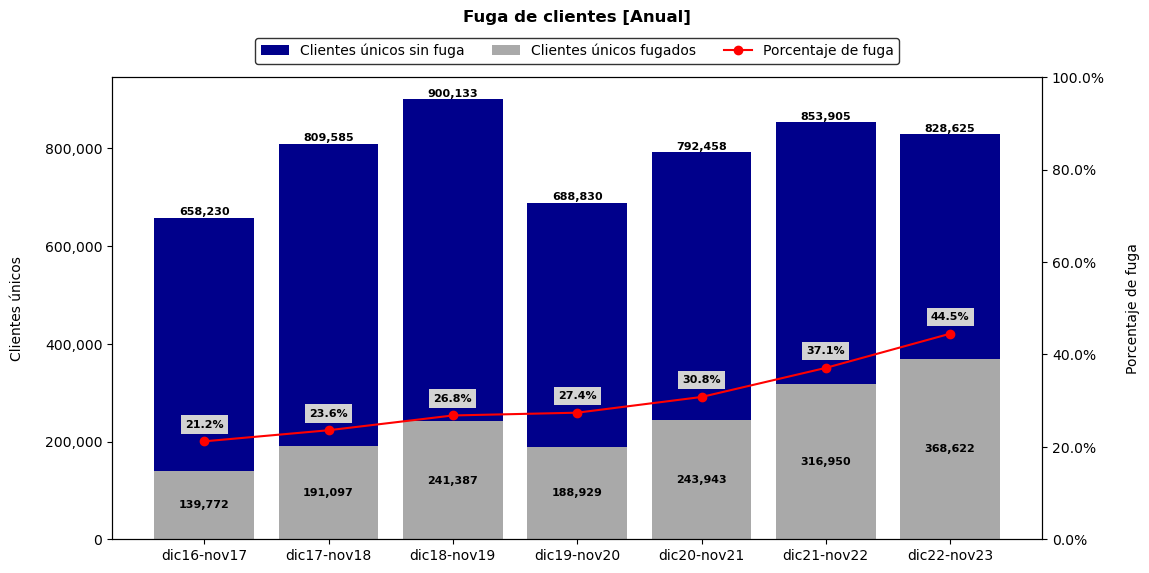

In [9]:
import matplotlib.pyplot as plt

# Datos
fechas = ['ene16-dic16','ene17-dic17', 'ene18-dic18', 'ene19-dic19', 'ene20-dic20', 'ene21-dic21', 'ene22-dic22', 'ene23-dic23']
conteo_total = [658230, 809585, 900133, 688830, 792458, 841967, 842266]
conteo_fugado = [139772, 191097, 241387, 188929, 243943, 317072, 390796]
porcentajes = [21.2, 23.6, 26.8, 27.4, 30.8, 37.7, 46.4]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para el conteo total y el conteo fugado
bars1 = ax1.bar(fechas, conteo_total, color='darkblue', label='Clientes únicos sin fuga')
bars2 = ax1.bar(fechas, conteo_fugado, color='darkgray', label='Clientes únicos fugados')

# Añadir etiquetas de datos para conteos
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 1000, f'{yval:,.0f}', ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')

for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval:,.0f}', ha='center', va='center', fontsize=8, color='black', fontweight='bold')

# Etiquetas y títulos del eje y principal
ax1.set_ylabel('Clientes únicos', labelpad=15)
ax1.set_title('Fuga de clientes [Anual]', pad=40, fontweight='bold')

# Ocultar título del eje x
ax1.set_xlabel('')
ax1.set_xticklabels(fechas)

# Formatear los datos del eje y principal con separador de miles
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Crear un segundo eje y para el porcentaje
ax2 = ax1.twinx()
ax2.plot(fechas, porcentajes, color='red', marker='o', linestyle='-', label='Porcentaje de fuga', zorder=5)

# Añadir etiquetas de datos para porcentajes con un decimal
for i, txt in enumerate(porcentajes):
    ax2.annotate(f'{txt:.1f}%', (fechas[i], porcentajes[i] + 3), ha='center', fontsize=8, color='black', fontweight='bold', bbox=dict(facecolor='lightgray', edgecolor='none', pad=3))

ax2.set_ylabel('Porcentaje de fuga', labelpad=15)
ax2.set_ylim(0, 100)  # Ajustar el rango del eje y del porcentaje para que esté más arriba de las barras
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:.1f}%'.format(x)))


# Unificar y ajustar la leyenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, 1.10), ncol=3, frameon=True).get_frame().set_edgecolor('black')

# Mostrar el gráfico
plt.show()
